In [1]:
import json
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, roc_curve, precision_score, recall_score

In [2]:
with open('../models/model/dt.sav', 'rb') as ifile:
    dt_model = pickle.load(ifile)

with open('../models/model/rf.sav', 'rb') as ifile:
    rf_model = pickle.load(ifile)
    
with open('../models/model/gb.sav', 'rb') as ifile:
    gb_model = pickle.load(ifile)

In [3]:
with open('../models/output/dt.json', 'rb') as ifile:
    output = json.load(ifile)
    dt_y_pred = output['y_pred_test']
    X_test = output['X_test']
    y_test = output['y_test']

with open('../models/output/rf.json', 'rb') as ifile:
    output = json.load(ifile)
    rf_y_pred = output['y_pred_test']
    
with open('../models/output/gb.json', 'rb') as ifile:
    output = json.load(ifile)
    gb_y_pred = output['y_pred_test']

In [4]:
print('--Decision Tree Results--')
print('Accuracy: ', dt_model.score(X_test, list(y_test)))
print('Precision: ', precision_score(list(y_test), dt_y_pred))
print('Recall: ', recall_score(list(y_test), dt_y_pred))
print('F1 Score: ', f1_score(list(y_test), dt_y_pred))
print('Confusion Matrix: \n', confusion_matrix(list(y_test), dt_y_pred))
print('\n')

print('--Random Forest Results--')
print('Accuracy: ', rf_model.score(X_test, list(y_test)))
print('Precision: ', precision_score(list(y_test), rf_y_pred))
print('Recall: ', recall_score(list(y_test), rf_y_pred))
print('F1 Score: ', f1_score(list(y_test), rf_y_pred))
print('Confusion Matrix: \n', confusion_matrix(list(y_test), rf_y_pred))
print('\n')

print('--Gradient Boosting Results--')
print('Accuracy: ', gb_model.score(X_test, list(y_test)))
print('Precision: ', precision_score(list(y_test), gb_y_pred))
print('Recall: ', recall_score(list(y_test), gb_y_pred))
print('F1 Score: ', f1_score(list(y_test), gb_y_pred))
print('Confusion Matrix: \n', confusion_matrix(list(y_test), gb_y_pred))
print('\n')

--Decision Tree Results--
Accuracy:  0.707256046705588
Precision:  0.7308957952468007
Recall:  0.9090495679854479
F1 Score:  0.8102959059586542
Confusion Matrix: 
 [[ 1574  4416]
 [ 1200 11994]]


--Random Forest Results--
Accuracy:  0.7131984987489575
Precision:  0.7257572200046959
Recall:  0.9370926178566015
F1 Score:  0.8179953688389018
Confusion Matrix: 
 [[ 1318  4672]
 [  830 12364]]


--Gradient Boosting Results--
Accuracy:  0.7127814845704754
Precision:  0.7294827380241309
Recall:  0.9256480218281037
F1 Score:  0.8159406734366648
Confusion Matrix: 
 [[ 1461  4529]
 [  981 12213]]




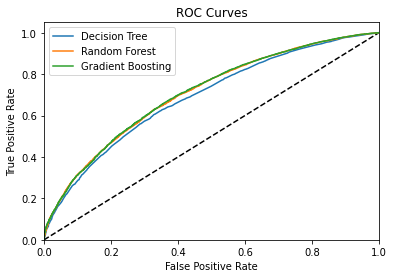

In [5]:
y_score_A = dt_model.predict_proba(X_test)[:,1]
y_score_B = rf_model.predict_proba(X_test)[:,1]
y_score_C = gb_model.predict_proba(X_test)[:,1]
fpr_A, tpr_A, _ = roc_curve(y_test,y_score_A)
fpr_B, tpr_B, _ = roc_curve(y_test,y_score_B)
fpr_C, tpr_C, _ = roc_curve(y_test,y_score_C)
plt.plot([0,1],[0,1],'k--')

plt.plot(fpr_A,tpr_A,label='Decision Tree')
plt.plot(fpr_B,tpr_B,label='Random Forest')
plt.plot(fpr_C,tpr_C,label='Gradient Boosting')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

In [6]:
num_features = ['stars_mean_neighborhood', 'stars_mean_restaurant',\
                'stars_coef','popularity']
cat_features = ['neighbor_labels', 'is_above_average']


df = pd.read_csv('../data/processed/features.csv')
importances = gb_model.feature_importances_
indices = np.argsort(importances)[::-1]
print("Feature ranking:")

df_features = df[num_features + cat_features]

for f in range(np.array(X_test).shape[1]):
    print("%d. feature: %s (%f)" % (f + 1, df_features.iloc[:,indices[f]].name, importances[indices[f]]))

Feature ranking:
1. feature: stars_coef (0.358982)
2. feature: popularity (0.261514)
3. feature: stars_mean_restaurant (0.185420)
4. feature: neighbor_labels (0.113440)
5. feature: stars_mean_neighborhood (0.080263)
6. feature: is_above_average (0.000381)
